In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot: xlabel='test_result', ylabel='count'>

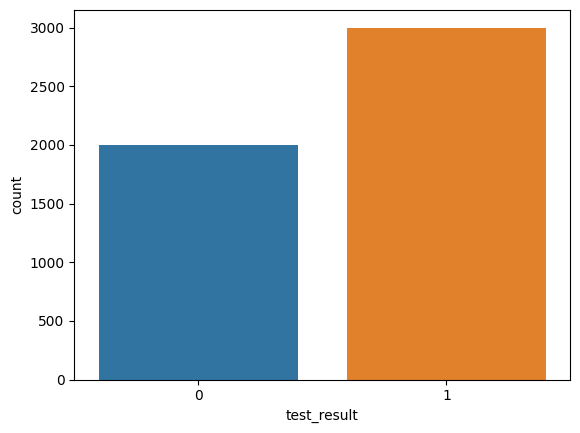

In [7]:
sns.countplot(data=df , x = "test_result")

<AxesSubplot: xlabel='test_result', ylabel='age'>

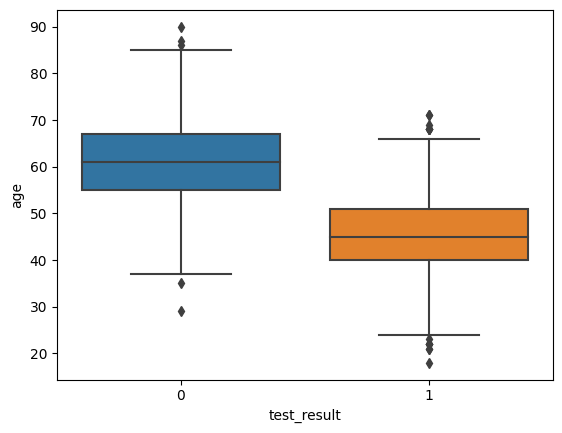

In [8]:
sns.boxplot(data=df , x = "test_result" , y = 'age')

<AxesSubplot: xlabel='test_result', ylabel='physical_score'>

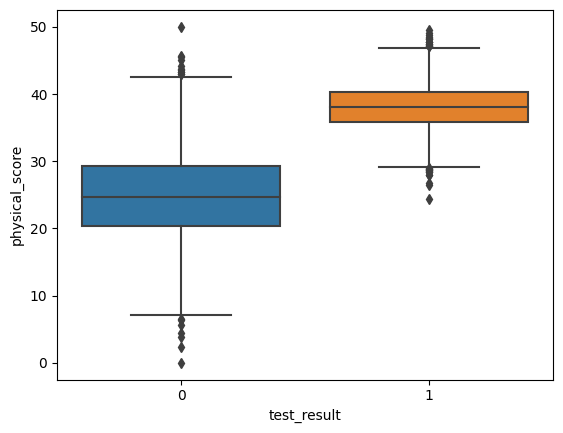

In [9]:
sns.boxplot(data=df , x = "test_result" , y = "physical_score")

<AxesSubplot: xlabel='age', ylabel='physical_score'>

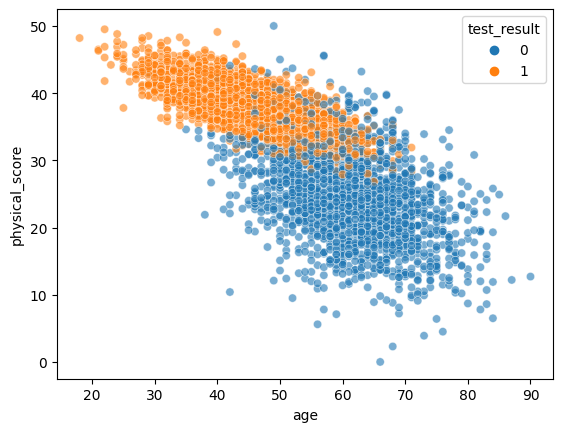

In [11]:
sns.scatterplot(data=df,
                x = "age",
                y="physical_score",
                hue="test_result",
                alpha = 0.6)

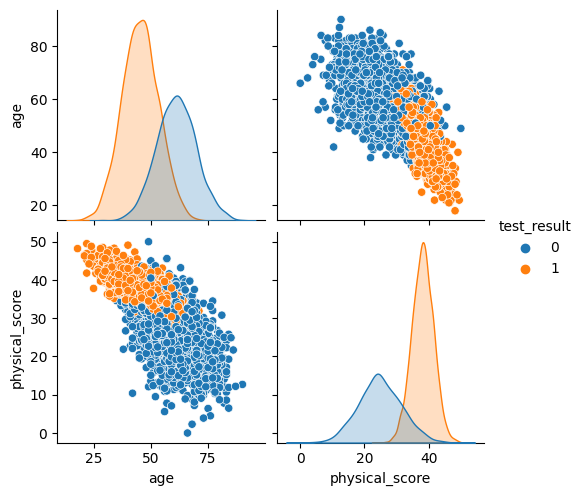

In [12]:
sns.pairplot(data=df , hue="test_result")

<AxesSubplot: >

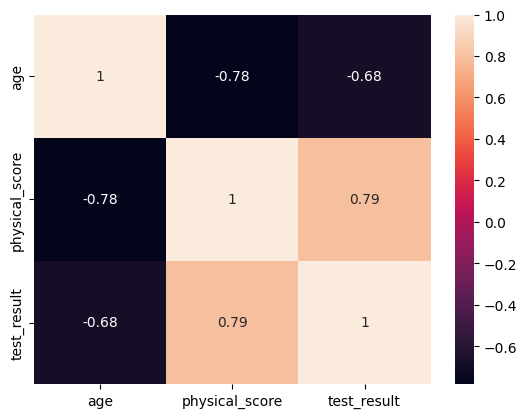

In [14]:
sns.heatmap(data=df.corr(), annot=True)

<AxesSubplot: xlabel='physical_score', ylabel='test_result'>

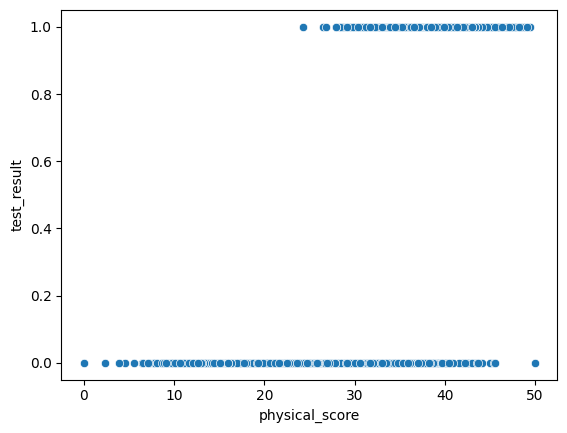

In [15]:
# Don't do this 
sns.scatterplot(data=df , x="physical_score" , y = "test_result")

<AxesSubplot: xlabel='age', ylabel='test_result'>

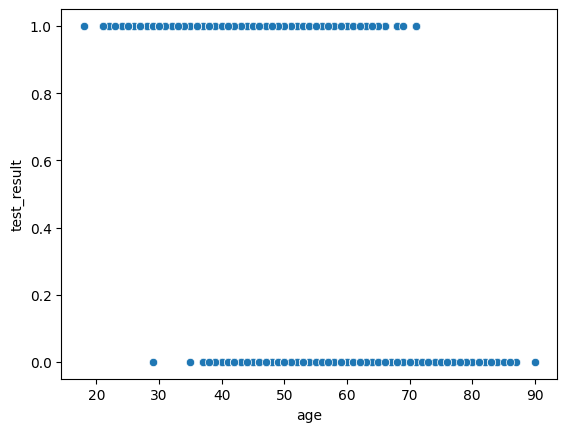

In [16]:
# Don't do this 
sns.scatterplot(data=df , x="age" , y = "test_result")

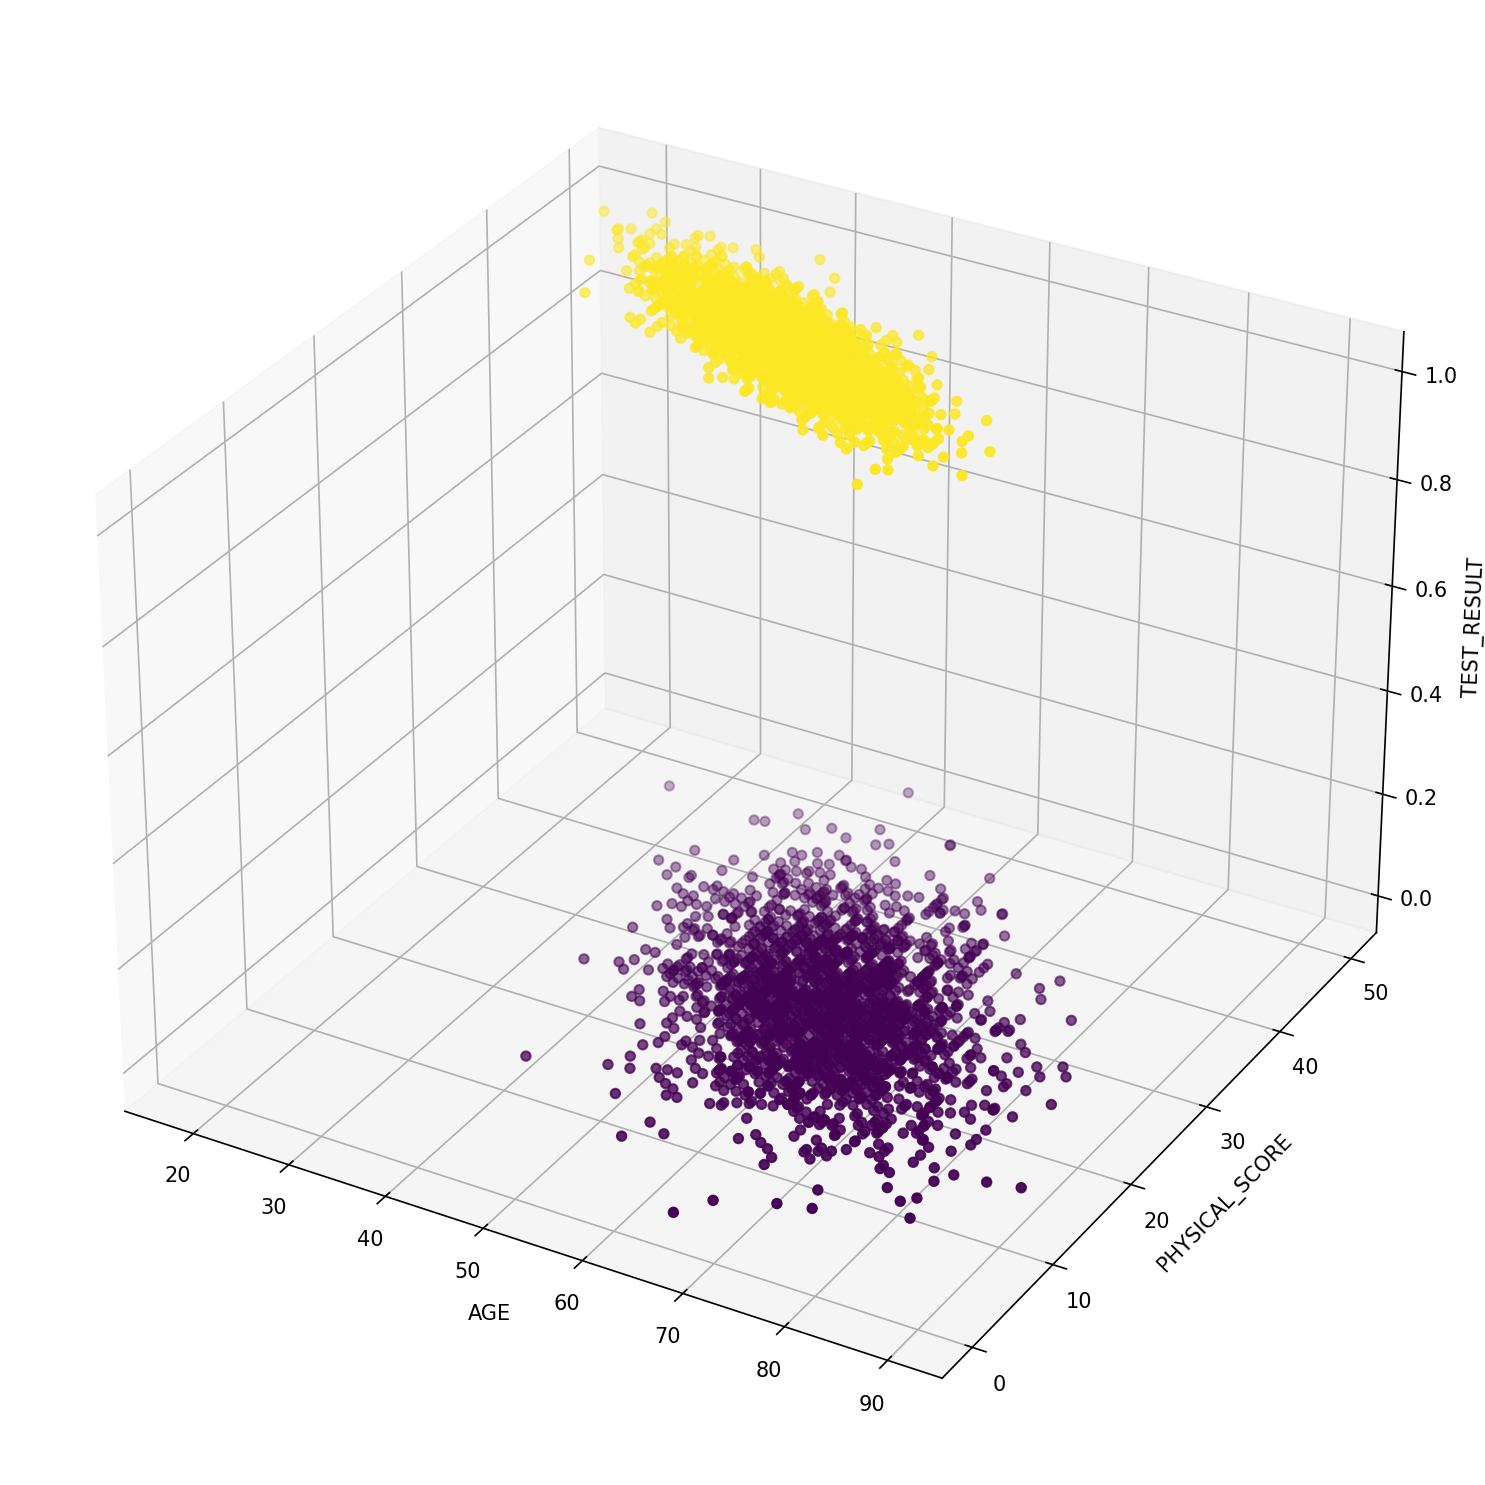

In [18]:
# Profs. show the 3D plot
# from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10), dpi = 150)
ax = fig.add_subplot(111,projection="3d")
ax.scatter(df["age"],df["physical_score"],df["test_result"],c=df["test_result"])
ax.set_xlabel("AGE")
ax.set_ylabel("PHYSICAL_SCORE")
ax.set_zlabel("TEST_RESULT")
fig.tight_layout();

# Create model

In [19]:
#Step2 : Divide X ,y
X = df.drop("test_result",axis=1)
y= df['test_result']

In [20]:
# step3 : Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [21]:
# step#4 Do we need scaling ? Not a must but it's better to do it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [22]:
# Step 5 # Discuss polynomial ( Plz. check after Lunch part at the end of this notebook)

In [ ]:
# Step 6 : Build LogisticRegression model
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
help(LogisticRegression)

In [ ]:
help(LogisticRegressionCV)

In [25]:
# Normal LoR
lor_model = LogisticRegression()

In [26]:
lor_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [27]:
lor_model.coef_

array([[-0.94953524,  3.45991194]])

In [28]:
from sklearn.metrics import accuracy_score
y_pred = lor_model.predict(scaled_X_test)

In [29]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [30]:
accuracy_score(y_test,y_pred)

0.93

In [31]:
lor_model_cv = LogisticRegressionCV()

In [32]:
lor_model_cv.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [33]:
lor_model_cv.C_

array([0.35938137])

In [34]:
lor_model_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [35]:
y_pred_cv = lor_model_cv.predict(scaled_X_test)
accuracy_score(y_test,y_pred_cv)

0.932

In [36]:
# Check Polynomial model - After Lunch
from sklearn.preprocessing import PolynomialFeatures

In [39]:
def Lor_accuracy_score(test_size):
    train_accuracy_list = []
    test_accuracy_list = []

    for d in range(1,11):
        # create poly-convertor
        polynomial_convertor = PolynomialFeatures(degree=d,include_bias=False)
        # Create our Poly X
        poly_features = polynomial_convertor.fit_transform(X)
        # train_test_split
        X_train, X_test, y_train, y_test = train_test_split(poly_features,
                                                            y,
                                                            test_size=test_size,
                                                            random_state=101)
        # scaling
        scaler = StandardScaler()
        scaled_X_train = scaler.fit_transform(X_train)
        scaled_X_test = scaler.transform(X_test)
        
        # Train our model
        model = LogisticRegressionCV(fit_intercept=True,
                                    max_iter=10_000)
        model.fit(scaled_X_train,y_train)

        #Calculate and collect accuracy score
        train_pred = model.predict(scaled_X_train)
        test_pred = model.predict(scaled_X_test)

        train_accuracy = accuracy_score(y_train,train_pred)
        test_accuracy = accuracy_score(y_test,test_pred)

        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
    plt.plot(range(1,10),train_accuracy_list[:9],label='TRAIN')
    plt.plot(range(1,10),test_accuracy_list[:9],label='TEST')
    plt.xlabel("Polynomial Complexity")
    plt.ylabel("accuracy")
    plt.title(f"Train_Test_accuracy_score_set_size: {test_size}")
    plt.legend()
    plt.show()

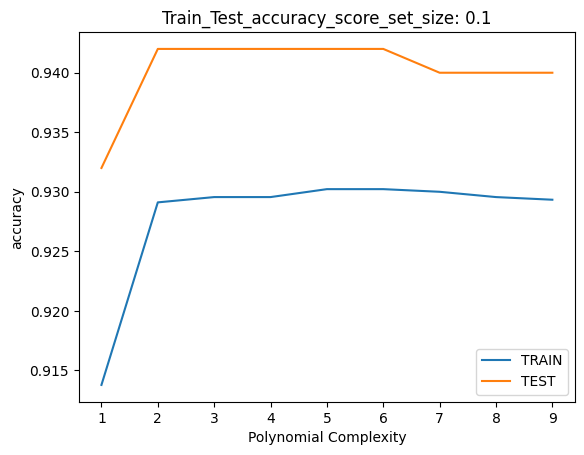

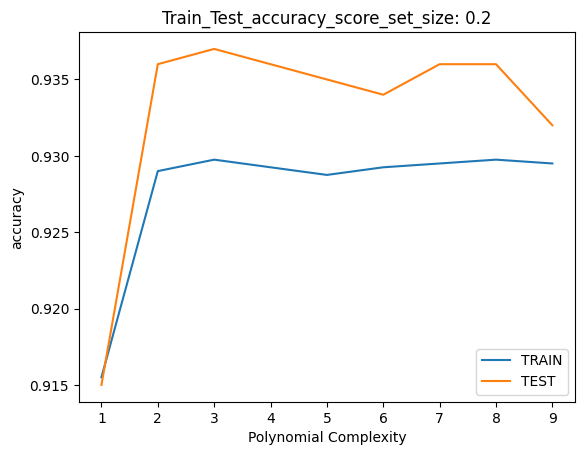

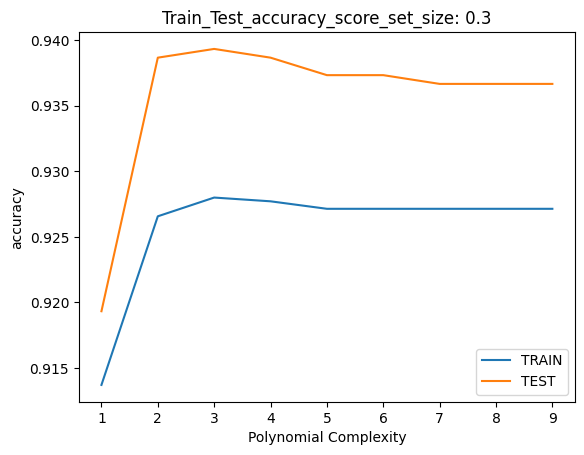

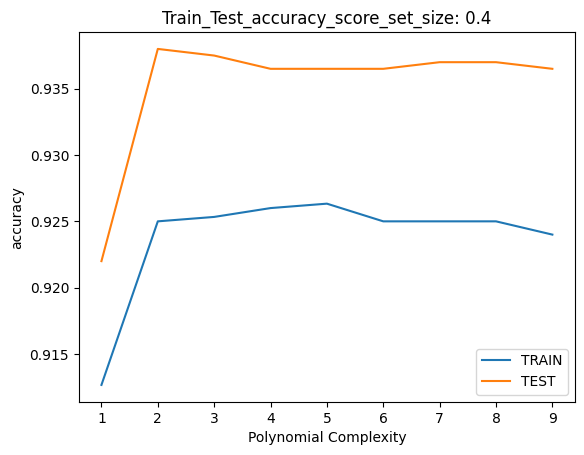

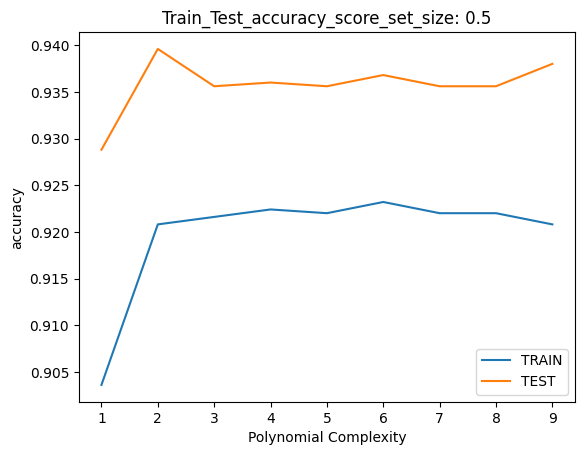

In [40]:
test_sizes = [0.1,0.2,0.3,0.4,0.5]
for test_size in test_sizes:
    Lor_accuracy_score(test_size)

# Based on diagrams below we found : 
    #Test_size = 0.1 ==> acc = 0.945 => d = 2 => So we continue with d2 from Step 6 instead of d1 :) 
    #Test_size = 0.2 ==> acc < 0.940 => d = 2
    #Test_size = 0.3 ==> acc = 0.940 => d = 3
    #Test_size = 0.4 ==> acc < 0.940 => d = 2
    #Test_size = 0.5 ==> acc = 0.940 => d = 2